# Preprocess calls

### Imports

In [1]:
import sys 
sys.path.append('/Users/Emily/code/emilycardwell/final-project-cleaning/py_files')

In [2]:
import pandas as pd
import os.path

from string_cleaning import drop_dups_cols, clean_chords
from genre_cleaning import genre_cleaning
from columns import new_columns, song_length
from get_data_slice import filter_length, get_songs
from utils import df_to_csv, count_chords, count_genres, count_artists

## Read Data

In [16]:
#file_to_open = os.path.join('path from user to foler', 'data_folder', 'raw', 'file.ext')
my_path = os.path.join('~/code/emilycardwell/final-project-data', 
                            'data', 'raw', 'chords_and_lyrics.csv')
raw_kaggle_df = pd.read_csv(my_path)

In [18]:
jazz_path = os.path.join('~/code/emilycardwell/final-project-data', 
                         'data/raw/chord_sentences.txt')
raw_jazz_df = pd.read_(jazz_path)
raw_jazz_df

,_START_ C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj G:9 G:9 G:9 G:9 G:9 G:9 G:9 G:9 C:9 C:9 C:9 C:9 C:7 C:7 C:7 C:7 F:maj F:maj F:maj F:maj F:min7 F:min7 F:min7 F:min7 C:maj C:maj C:maj C:maj G:min7 G:min7 G:min7 G:min7 A:7 A:7 A:7 A:7 D:9 D:9 D:9 D:9 G:9 G:9 G:9 G:9 E:min7 E:min7 G:7 G:7 C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj A:min7 A:min7 A:min7 A:min7 A:min7 A:min7 A:min7 A:min7 E:min7 E:min7 E:min7 E:min7 E:min7 E:min7 E:min7 E:min7 F:maj7 F:maj7 F:maj7 F:maj7 F:7 F:7 F:7 F:7 C:maj C:maj C:maj C:maj C:maj C:maj C:7 C:7 F:maj F:maj F:maj F:maj F:min7 F:min7 F:min7 F:min7 C:maj C:maj C:maj C:maj A:7 A:7 A:7 A:7 D:7 D:7 D:7 D:7 D:7 D:7 G:7 G:7 C:maj C:maj C:maj C:maj C:maj C:maj G:7 G:7 _END_ _START_ D#:maj D#:maj D#:maj D#:maj D#:maj D#:maj A#:7 A#:7 D#:maj D#:maj D#:maj D#:maj G:min G:min G:min G:min D#:maj D#:maj D#:maj D#:maj D#:maj D#:maj A#:7 A#:7 D#:maj D#:maj D#:maj D#:maj B:7 B:7 A#:7 A#:7 D#:maj D#:maj D#:maj D#:maj D#:maj D#:maj A#:7 A#:7 D#:maj D#:maj D#:maj D#:maj D#:7 D#:7 D#:7 D#:7 G:maj/5 G:maj/5 G:maj/5 G:maj/5 G:maj/5 G:maj/5 D:7 D:7 G:maj G:maj G:maj G:maj A#:7/5 A#:7/5 A#:7/5 A#:7/5 D#:7 D#:7 D#:7 D#:7 D#:7 D#:7 D:7 D:7 G:7 G:7 G:dim G:dim G:maj G:maj D:7 G:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj A:7 A:7 A:7 A:7 A:7 A:7 A:7 A:7 D:min D:min D:min D:min D:hdim D:hdim D:hdim D:hdim C:maj/5 C:maj/5 C:maj/5 C:maj/5 C:7 C:7 C:7 C:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 E:7 E:7 E:7 E:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj F:maj F:maj F:maj F:maj F:maj F:maj F#:dim F#:dim C:maj C:maj C:maj/7 C:maj/b7 A:7 A:7 A:7 A:7 D:7 D:7 D:7 D:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj G:maj G:maj D:7 G:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj A:7 A:7 A:7 A:7 A:7 A:7 A:7 A:7 D:min D:min D:min D:min D:hdim D:hdim D:hdim D:hdim C:maj/5 C:maj/5 C:maj/5 C:maj/5 C:7 C:7 C:7 C:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 E:7 E:7 E:7 E:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj F:maj F:maj F:maj F:maj F:maj F:maj F#:dim F#:dim C:maj C:maj C:maj/7 C:maj/b7 A:7 A:7 A:7 A:7 D:7 D:7 D:7 D:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj G:maj G:maj D:7 G:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj A:7 A:7 A:7 A:7 A:7 A:7 A:7 A:7 D:min D:min D:min D:min D:hdim D:hdim D:hdim D:hdim C:maj/5 C:maj/5 C:maj/5 C:maj/5 C:7 C:7 C:7 C:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 B:7 E:7 E:7 E:7 E:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:maj E:min E:min E:min E:min E:min E:min C:7 C:7 F:maj F:maj F:maj F:maj F:maj F:maj F:maj F:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj E:maj F:maj F:maj F:maj F:maj F:maj F:maj F#:dim F#:dim C:maj C:maj C:maj/7 C:maj/b7 A:7 A:7 A:7 A:7 D:7 D:7 D:7 D:7 G:7 G:7 G:7 G:7 C:maj C:maj C:maj C:maj G:maj G:maj D:7 G:maj _END_ _START_ C:maj7 C:maj7 D:min7 D:min7 E:min7 E:min7 D:min7 D:min7 C:maj7 C:maj7 D:min7 D:min7 E:min7 E:min7 D:min7 D:min7 C:maj C:maj A:min7 A:min7 D:min7 D:min7 G:7 G:7 C:maj C:maj A:min7 A:min7 D:min7 D:min7 G:7 G:7 C:maj C:maj A:min7 A:min7 D:9 D:9 G:7 G:7 C:maj C:maj A:7 A:7 D:min7 D:min7 G:7 G:7(s5,*5) C:maj C:maj A:min7 A:min7 D:min7 D:min7 G:7 G:7 C:maj C:maj A:min7 A:min7 D:min7 D:min7 G:7 G:7 C:maj C:maj A:min7 A:min7 D:min7 D:min7 G:7 G:7 C:maj C:maj D:min7 D:min7 D#:dim D#:dim C:maj/3 C:maj/3 D:min7 D:min7 G:7 G:7 C:maj C:maj C#:dim C#:dim D:min7 D:min7 G:7 G:7 C:maj C:maj C:maj C:maj B:hdim B:hdim E:7 E:7 A:min7 A:min7 A:min7 A:min7 D:9 D:9 D:9 D:9 G:7 G:7 G:9(s5,*5) G:

## CONCAT MULTIPLE CSVs

In [4]:
# TO DO

## Clean DF

In [5]:
slim_df = drop_dups_cols(raw_df)

## Clean Chords

In [6]:
cleaned_chords_column = clean_chords(slim_df['chords'])
cleaned_df = slim_df.copy()
cleaned_df['chords'] = cleaned_chords_column

### drop duplicates based on chords and song name

In [7]:
new_columns_df = new_columns(cleaned_df)

unreplicated_df = \
    new_columns_df.drop_duplicates(subset=['chords_list', 'song_name'],
                                   keep = 'last').reset_index(drop = True)
    
# drop unnecessary columns
unreplicated_df.drop(columns=['song_name', 'chords_list'], inplace=True)

## Clean Genres

In [8]:
slim_genres = genre_cleaning(unreplicated_df['genres'])
clean_genres_df = unreplicated_df.copy()
clean_genres_df['genres'] = slim_genres

## Get Song Length (chord count)

In [9]:
song_len_df = song_length(clean_genres_df)
song_len_df

,artist_name,genres,chords,song_length
0,Justin Bieber,pop,"[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...",79
1,Justin Bieber,pop,"[F#m7, D, E, F#m7, A, E, D, E, Bm, A, D, E, F#...",56
2,Justin Bieber,pop,"[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",107
3,Justin Bieber,pop,"[Em, Bm, Am, C, Em, Bm, Am, C, Em, Bm, Am, C, ...",97
4,Justin Bieber,pop,"[Gm, Dm, C, Gm, Dm, C, Gm, Dm, C, Gm, A#, Cdim...",57
...,...,...,...,...
131529,Simon & Garfunkel,folk,"[E, F#, E, B, F#, E, B, E, B, F#, E, C#m, E, G...",47
131530,Simon & Garfunkel,folk,"[G, Am, C, F, C, F, C, F, C, Am, G, Am, G, Am,...",59
131531,Simon & Garfunkel,folk,"[C, Dm, F, Bb, F, Bb, F, Bb, F, Dm, C, Dm, C, ...",60
131532,Simon & Garfunkel,folk,"[Em, C, G, Am, C, D, G, Em, C, G, Am, D, G, D,...",64


## Filter DF

#### by song length

In [10]:
final_df = filter_length(song_len_df)

#### by number of samples (songs)

In [11]:
final_df = get_songs(final_df, size=5000)

## Send df to cvs

In [12]:
#df_to_csv(final_df, '2', '~/code/emilycardwell/final-project-data/data/clean')

# Utility Calls

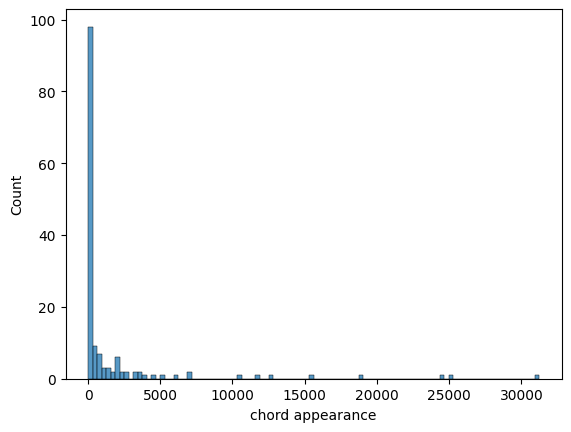

,chord_count
Gm5,10
Am5aug,10
Dm7b5,10
F#7b,10
Am7b5,10
...,...
F,15564
A,18991
D,24456
C,25049


In [13]:
chord_count_df = count_chords(final_df, low_freq_to_remove=10, 
                              histplot=True, ascending=True)
chord_count_df

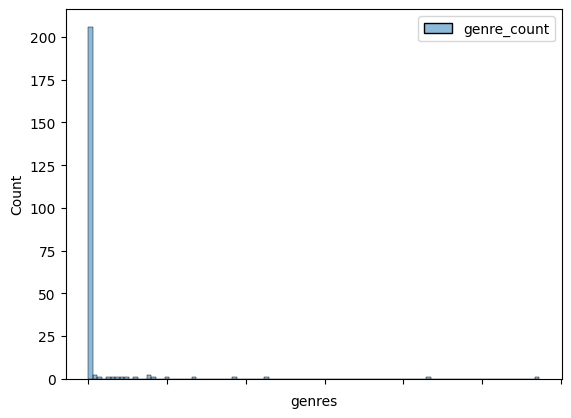

In [14]:
genre_count_df = count_genres(final_df, histplot=True)

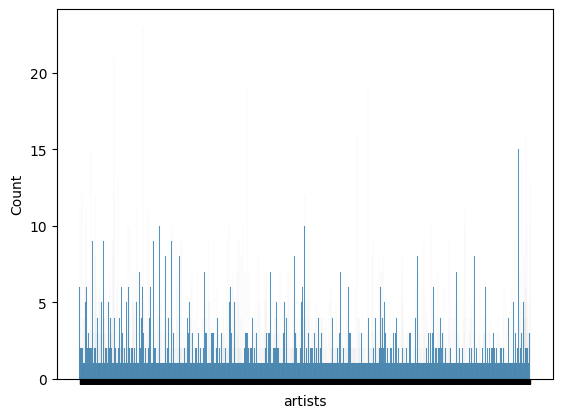

In [15]:
artists_df = count_artists(final_df, histplot=True)